In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file = '/content/amazon_uk_shoes_products_dataset_2021_12.csv'
df = pd.read_csv(file)
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6823 entries, 0 to 6822
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                6823 non-null   object 
 1   product_name       6823 non-null   object 
 2   reviewer_name      6823 non-null   object 
 3   review_title       6822 non-null   object 
 4   review_text        6814 non-null   object 
 5   review_rating      6823 non-null   float64
 6   verified_purchase  6823 non-null   bool   
 7   review_date        6823 non-null   object 
 8   helpful_count      1953 non-null   object 
 9   uniq_id            6823 non-null   object 
 10  scraped_at         6823 non-null   object 
dtypes: bool(1), float64(1), object(9)
memory usage: 539.8+ KB


,review_rating
count,6823.000000
mean,4.132493
std,1.336969
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
print(df.shape)
df.head(5)

(6823, 11)


,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
0,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,True,Reviewed in the United States on 2 June 2020,2 people found this helpful,36eae4e5-2894-5279-a0b7-d2b330e2b814,24/12/2021 02:26:25
1,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,True,Reviewed in the United States on 28 October 2021,NaN,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,24/12/2021 02:26:25
2,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,True,Reviewed in the United States on 20 January 2021,NaN,db5a7525-d40b-5265-84d8-df4f29837a3b,24/12/2021 02:26:25
3,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0,True,Reviewed in the United States on 22 April 2021,NaN,75a42851-6462-54b5-988a-27d336221943,24/12/2021 02:26:25
4,https://www.amazon.co.uk/dp/B08SW434MG,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0,True,Reviewed in Italy on 2 April 2021,2 people found this helpful,232dee43-849e-5d06-ba05-efb3f4814714,24/12/2021 02:26:25


Eliminating other countries where language is not English

In [ ]:
df_English = df[df['review_date'].str.contains('Reviewed in the United States') | df['review_date'].str.contains('Reviewed in Canada') | df['review_date'].str.contains('Reviewed in India')]

In [ ]:
print(df.shape)
print(df_English.shape)


(6823, 11)
(4003, 11)


Excluding Features URL, Reviewer Name, Unique ID,Review Date, Scraped At

In [ ]:
data = df_English.drop(['url','reviewer_name','scraped_at','uniq_id','review_date'], axis=1, inplace=False)

In [ ]:
data.info()
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4003 entries, 0 to 6817
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_name       4003 non-null   object 
 1   review_title       4002 non-null   object 
 2   review_text        3999 non-null   object 
 3   review_rating      4003 non-null   float64
 4   verified_purchase  4003 non-null   bool   
 5   helpful_count      1483 non-null   object 
dtypes: bool(1), float64(1), object(4)
memory usage: 191.5+ KB
(4003, 6)


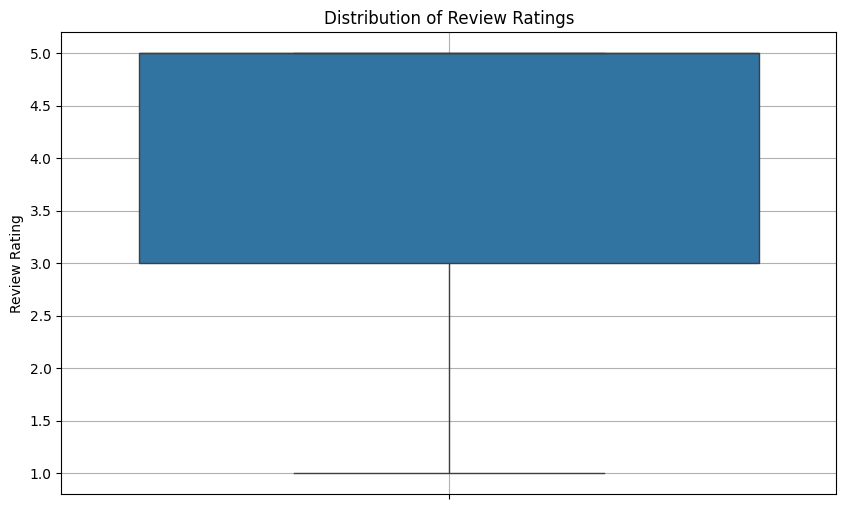

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot(y=data['review_rating'])

plt.title('Distribution of Review Ratings')
plt.ylabel('Review Rating')  # Adjust label as needed
plt.grid(True)  # Optional: Adds a grid for better readability
plt.show()


In [ ]:
# EDA to view the data

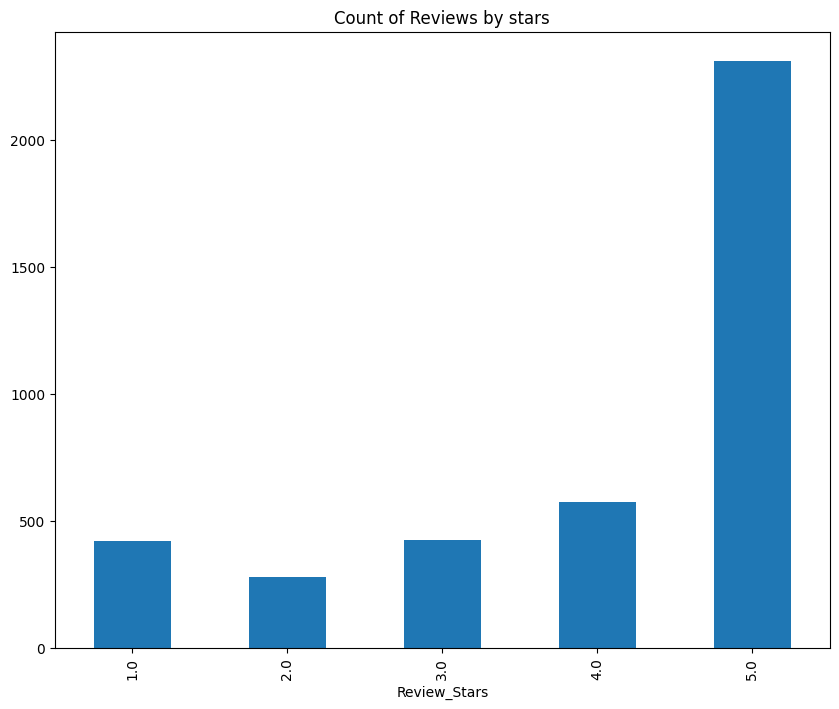

In [ ]:
    ax = data['review_rating'].value_counts().sort_index() \
        .plot(kind ='bar', title = 'Count of Reviews by stars',figsize=(10,8))
    ax.set_xlabel('Review_Stars')
    plt.show()

In [ ]:
# Function to assign categories to the review_rating column

In [ ]:
def categorize_rating(rating):
    if rating >= 4.0:
        return 'good'
    elif rating >= 3.0:
        return 'average'
    else:
        return 'bad'

data['rating_category'] = data['review_rating'].apply(categorize_rating)


In [ ]:
print(data.head())

                                         product_name  \
0   Klasified Women's Transparent Clear Sneaker Sh...   
1   Klasified Women's Transparent Clear Sneaker Sh...   
2   Klasified Women's Transparent Clear Sneaker Sh...   
3   Klasified Women's Transparent Clear Sneaker Sh...   
14  adidas Women's Retrorun Shoes Running, Core Bl...   

                   review_title  \
0                       Love em   
1            The plastic ripped   
2                  Good quality   
3                          Good   
14  Perfect right outta the box   

                                          review_text  review_rating  \
0   Love these. Was looking for converses and thes...            5.0   
1   The shoes are very cute, but after the 2nd day...            2.0   
2                                        Good quality            5.0   
3                                               Great            5.0   
14  True to size. If between I'd probably go with ...            5.0   

    verified_

In [ ]:
# Preprocessing the data (review_text and review_title) convert all the data in review_text column into string format and replace null with empty string

In [ ]:
data['review_text']=data['review_text'].fillna('') # replace nulls with empty string
data['review_text']=data['review_text'].apply(lambda x:str(x)) # convert into string data types

In [ ]:
#Import NTLK libraries for preprocessing the text data
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
#  preprocess_text function to pre-process the "review" column (feature)
def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text.lower())




    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]




    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]




    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# apply the function df

data['review_text'] = data['review_text'].apply(preprocess_text)
data

,product_name,review_title,review_text,review_rating,verified_purchase,helpful_count,rating_category
0,Klasified Women's Transparent Clear Sneaker Sh...,Love em,love . looking converse half price unique— ’ n...,5.0,True,2 people found this helpful,good
1,Klasified Women's Transparent Clear Sneaker Sh...,The plastic ripped,"shoe cute , 2nd day wearing tongue started rip...",2.0,True,NaN,bad
2,Klasified Women's Transparent Clear Sneaker Sh...,Good quality,good quality,5.0,True,NaN,good
3,Klasified Women's Transparent Clear Sneaker Sh...,Good,great,5.0,True,NaN,good
14,"adidas Women's Retrorun Shoes Running, Core Bl...",Perfect right outta the box,true size . 'd probably go lower end i.e 8-8.5...,5.0,True,One person found this helpful,good
...,...,...,...,...,...,...,...
6813,"Skechers Kids Boys' Nitrate-95358N Sneaker, Bl...",Great for early walkers,shoe ( many try ) worked early walker bitty fo...,5.0,True,One person found this helpful,good
6814,"Skechers Kids Boys' Nitrate-95358N Sneaker, Bl...",Three Stars,narrow hard get toddler,3.0,True,NaN,average
6815,"Skechers Kids Boys' Nitrate-95358N Sneaker, Bl...",Said they were very comfortable.,son love . said comfortable .,5.0,True,NaN,good
6816,"Skechers Kids Boys' Nitrate-95358N Sneaker, Bl...",They are smaller than other shoes the same size,size 8 smaller size 7 son outgrowing . disappo...,2.0,True,One person found this helpful,bad


In [ ]:
# initialize NLTK sentiment analyzer

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler # for scaling the negative values generated by compound score

# Initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Create a function to classify sentiment
def classify_sentiment(text):
    # Get sentiment scores
    scores = analyzer.polarity_scores(text)

    # Determine sentiment based on compound score
#    if scores['compound'] >= 0.05:
#        return 'positive'
#    elif scores['compound'] <= -0.05:
#        return 'negative'
#    else:
#        return 'neutral'
    return scores['compound']

# apply get_sentiment function

data['sentiment'] = data['review_text'].apply(classify_sentiment)
scaler = MinMaxScaler()
data['sentiment'] = scaler.fit_transform(data['sentiment'].values.reshape(-1, 1))

data

,product_name,review_title,review_text,review_rating,verified_purchase,helpful_count,rating_category,sentiment
0,Klasified Women's Transparent Clear Sneaker Sh...,Love em,love . looking converse half price unique— ’ n...,5.0,True,2 people found this helpful,good,0.960176
1,Klasified Women's Transparent Clear Sneaker Sh...,The plastic ripped,"shoe cute , 2nd day wearing tongue started rip...",2.0,True,NaN,bad,0.833077
2,Klasified Women's Transparent Clear Sneaker Sh...,Good quality,good quality,5.0,True,NaN,good,0.715295
3,Klasified Women's Transparent Clear Sneaker Sh...,Good,great,5.0,True,NaN,good,0.809736
14,"adidas Women's Retrorun Shoes Running, Core Bl...",Perfect right outta the box,true size . 'd probably go lower end i.e 8-8.5...,5.0,True,One person found this helpful,good,0.815469
...,...,...,...,...,...,...,...,...
6813,"Skechers Kids Boys' Nitrate-95358N Sneaker, Bl...",Great for early walkers,shoe ( many try ) worked early walker bitty fo...,5.0,True,One person found this helpful,good,0.933047
6814,"Skechers Kids Boys' Nitrate-95358N Sneaker, Bl...",Three Stars,narrow hard get toddler,3.0,True,NaN,average,0.437295
6815,"Skechers Kids Boys' Nitrate-95358N Sneaker, Bl...",Said they were very comfortable.,son love . said comfortable .,5.0,True,NaN,good,0.908374
6816,"Skechers Kids Boys' Nitrate-95358N Sneaker, Bl...",They are smaller than other shoes the same size,size 8 smaller size 7 son outgrowing . disappo...,2.0,True,One person found this helpful,bad,0.245854


In [ ]:
print(data.loc[:, 'helpful_count'].unique()) # various values of the helpful_count which are needed furhter for classfication Alorithim


['2 people found this helpful' nan 'One person found this helpful'
 '19 people found this helpful' '12 people found this helpful'
 '11 people found this helpful' '13 people found this helpful'
 '4 people found this helpful' '9 people found this helpful'
 '3 people found this helpful' '6 people found this helpful'
 '7 people found this helpful' '8 people found this helpful'
 '5 people found this helpful' '47 people found this helpful'
 '22 people found this helpful' '26 people found this helpful'
 '10 people found this helpful' '16 people found this helpful'
 '14 people found this helpful' '65 people found this helpful'
 '53 people found this helpful' '20 people found this helpful'
 '89 people found this helpful' '74 people found this helpful'
 '34 people found this helpful' '38 people found this helpful'
 '23 people found this helpful' '41 people found this helpful'
 '46 people found this helpful' '32 people found this helpful'
 '21 people found this helpful' '28 people found this help

In [ ]:
# Function to work on helpful_content column to convert them into numeric

import pandas as pd
import numpy as np
import re

# Function to extract numbers from the strings
def extract_number(s):
    if pd.isna(s) or s.lower() == 'nan':
        return 0
    numbers = re.findall(r'\d+', s)
    if numbers:
        return int(numbers[0])  # Convert the first found number to an integer
    else:
        # Handle cases where the number is written in words (assuming only 'One' for simplicity)
        if 'one' in s.lower():
            return 1
        return 0

# Apply the function to the column
data['helpful_numbers'] = data['helpful_count'].apply(extract_number)


In [ ]:
print(data.iloc[1]['review_text']) # first row of review_text

shoe cute , 2nd day wearing tongue started ripping . 3rd day wearing plastic side ripped . could ripped bc wearing work lot walking work . ’ going buy ’ recommend wearing day lot walking might rip


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer # test on how the NTLK sentiment analyzer performs

# Initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores('shoe cute , 2nd day wearing tongue started ripping . 3rd day wearing plastic side ripped . could ripped bc wearing work lot walking work . ’ going buy ’ recommend wearing day lot walking might rip')

{'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'compound': 0.6705}

Note: We have not excluded the review_rating feature which is the base of review_category, kept it just to see how its functioning but in training and test data we are not using the actual dataset but a subset as hstack of TDIF vectors and other features converted into array to predict the rating_category. So its not leading to dataleak.

**Naives Bayesian** **Classsfication**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from scipy.sparse import hstack



data['review_text'] = data['review_text'].str.lower()
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust as needed
tfidf_features = tfidf_vectorizer.fit_transform(data['review_text'])


# Convert 'sentiment' and 'helpful_numbers','verified_purchase' to arrays and reshape for stacking
sentiment_array = np.array(data['sentiment']).reshape(-1, 1)
helpful_numbers_array = np.array(data['helpful_numbers']).reshape(-1, 1)
verified_purchase_array = np.array(data['verified_purchase']).reshape(-1,1)

# Combine TF-IDF features with 'sentiment' and 'helpful_numbers'
combined_features = hstack([tfidf_features, sentiment_array, helpful_numbers_array,verified_purchase_array])


#combined_features = hstack([tfidf_features, np.array(data['sentiment']).reshape(-1, 1)])
X_train, X_test, y_train, y_test = train_test_split(
    combined_features,
    data['rating_category'],
    test_size=0.2,
    random_state=42
)




# Initialize and train the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     average       0.46      0.07      0.12        89
         bad       0.63      0.26      0.37       147
        good       0.76      0.98      0.85       565

    accuracy                           0.74       801
   macro avg       0.62      0.43      0.45       801
weighted avg       0.70      0.74      0.68       801



In [ ]:
# Conusion Matrix(heatmap) for the Multinomimal Classifier(naive_bayes)

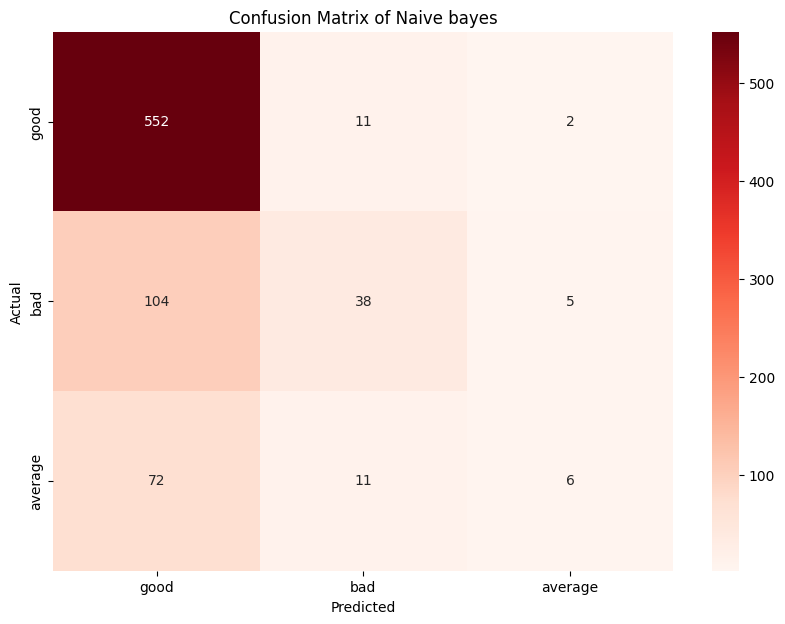

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test are the true labels and y_pred are the predictions from your model
cm = confusion_matrix(y_test, y_pred, labels=["good", "bad", "average"])

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["good", "bad", "average"], yticklabels=["good", "bad", "average"])
plt.title("Confusion Matrix of Naive bayes")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Class to binary mapping: {'average': 0, 'bad': 1, 'good': 2}


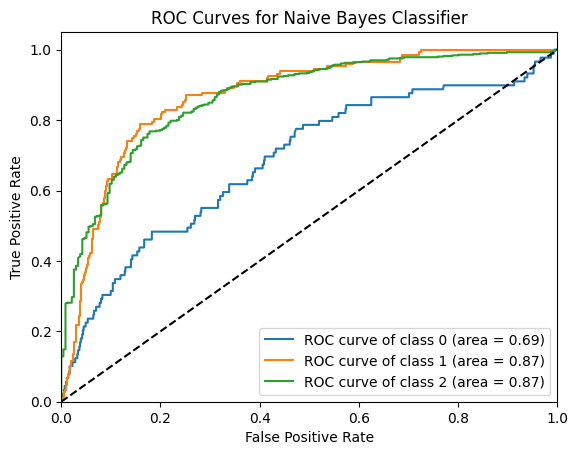

In [ ]:
# ROC curve for Naive Bayies classifier

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import RocCurveDisplay

thisclasses = np.unique(y_test)  # Get unique classes from y_test
y_test_binarized = label_binarize(y_test, classes=thisclasses)


# Correctly refer to 'thisclasses' when creating the class_to_binary mapping
class_to_binary = {label: index for index, label in enumerate(thisclasses)}
print("Class to binary mapping:", class_to_binary)


naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)
# Make predictions on the testing data
y_prob = naive_bayes_classifier.predict_proba(X_test)


fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binarized.shape[1]

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Draw the random chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Naive Bayes Classifier')
plt.legend(loc="lower right")
plt.show()

**Random Forest** **Classification**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize and train Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test) # use this for ROC curve
print(classification_report(y_test, y_pred)) # for classfication report






              precision    recall  f1-score   support

     average       0.43      0.03      0.06        89
         bad       0.62      0.48      0.54       147
        good       0.80      0.96      0.87       565

    accuracy                           0.77       801
   macro avg       0.62      0.49      0.49       801
weighted avg       0.72      0.77      0.72       801



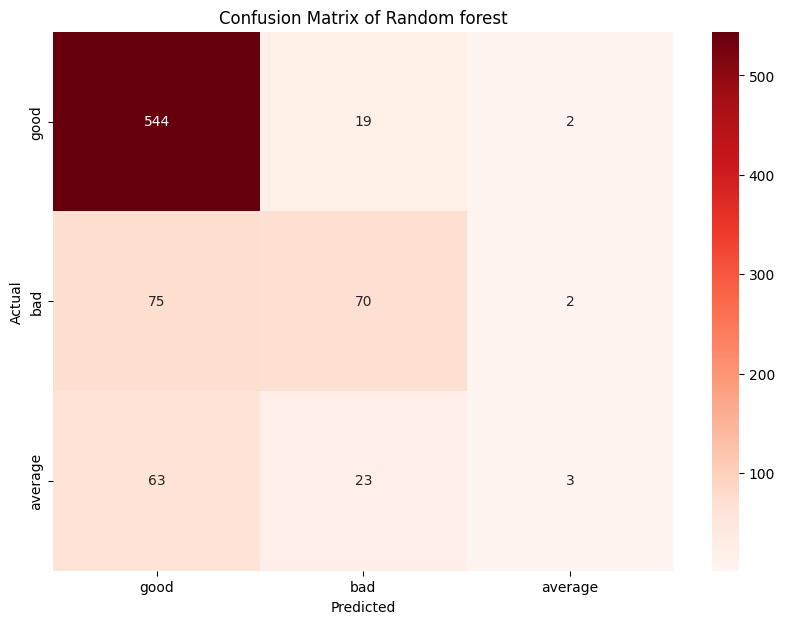

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test are the true labels and y_pred are the predictions from your model
cm = confusion_matrix(y_test, y_pred, labels=["good", "bad", "average"])

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["good", "bad", "average"], yticklabels=["good", "bad", "average"])
plt.title("Confusion Matrix of Random forest")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Class to binary mapping: {'average': 0, 'bad': 1, 'good': 2}


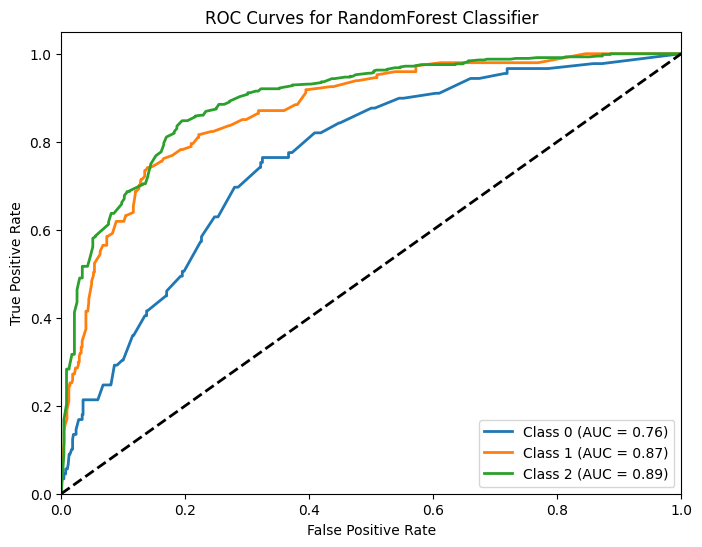

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your data split into training and testing sets
# X_train, X_test, y_train, y_test

# Initialize and fit the RandomForest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = rf_classifier.predict_proba(X_test)

# Binarize the test labels for multi-class
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)
n_classes = y_test_binarized.shape[1]

print("Class to binary mapping:", class_to_binary)
# Initialize dictionaries to store FPR, TPR, and AUC values
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], linewidth=2, label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for RandomForest Classifier')
plt.legend(loc="lower right")
plt.show()


**SVM** **Classification**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize and train the SVM classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     average       0.00      0.00      0.00        89
         bad       0.67      0.04      0.08       147
        good       0.71      1.00      0.83       565

    accuracy                           0.71       801
   macro avg       0.46      0.35      0.30       801
weighted avg       0.62      0.71      0.60       801



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


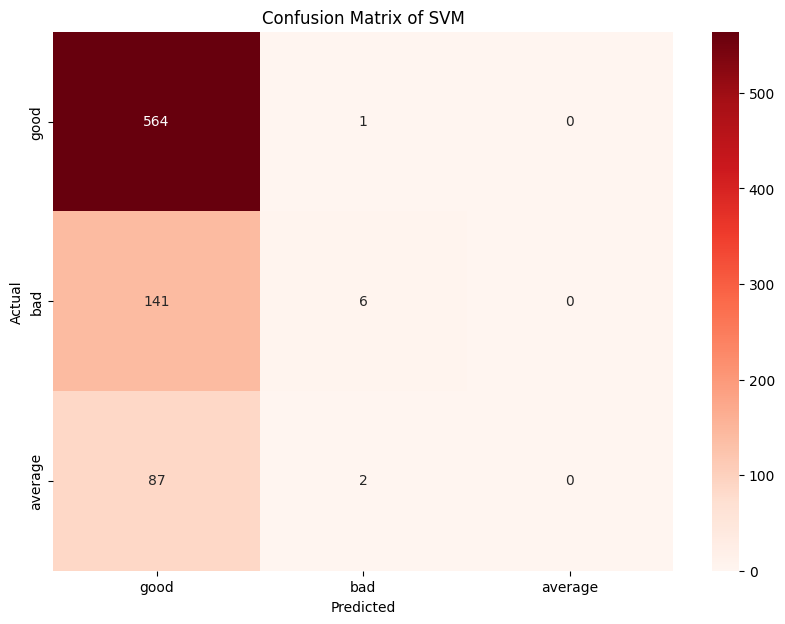

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test are the true labels and y_pred are the predictions from your model
cm = confusion_matrix(y_test, y_pred, labels=["good", "bad", "average"])

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["good", "bad", "average"], yticklabels=["good", "bad", "average"])
plt.title("Confusion Matrix of SVM")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



Class to binary mapping: {'average': 0, 'bad': 1, 'good': 2}


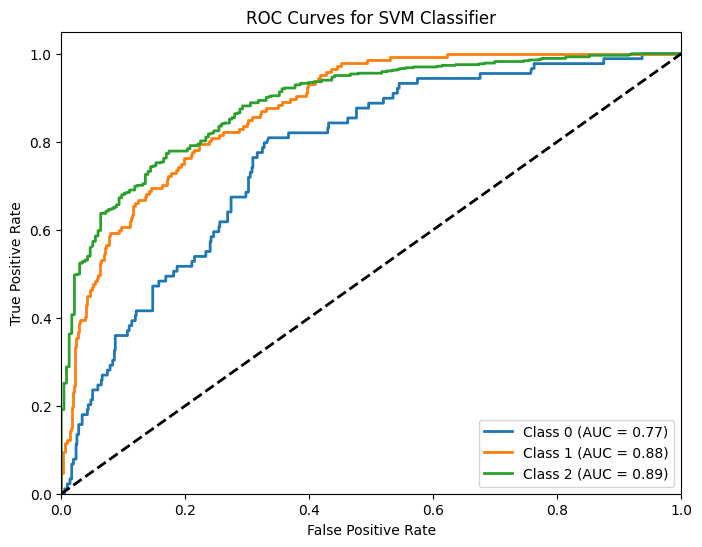

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
from sklearn.calibration import CalibratedClassifierCV

# Assuming you have your data split into training and testing sets
# X_train, X_test, y_train, y_test

# Initialize the SVM classifier
svm_classifier = SVC(probability=True)

# Optionally, wrap the classifier with CalibratedClassifierCV for better probability estimates
# svm_classifier = CalibratedClassifierCV(SVC())

svm_classifier.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = svm_classifier.predict_proba(X_test)

# Binarize the test labels for multi-class
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)
n_classes = y_test_binarized.shape[1]

print("Class to binary mapping:", class_to_binary)

# Initialize dictionaries to store FPR, TPR, and AUC values
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], linewidth=2, label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for SVM Classifier')
plt.legend(loc="lower right")
plt.show()
